In [1]:
import pandas as pd
import sys
import os
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datadir = "/media/sf_VBox_Shared/London/raw/first5/subsets/"
path_to_file5sec = os.path.join(datadir, "__016563_2014-08-08 12-02-19.bin_day1.csv")

In [3]:
filenames = os.listdir(datadir)
datasets = [pd.read_csv(os.path.join(datadir,fn)) for fn in filenames if os.path.isfile(os.path.join(datadir,fn))]
print(len(datasets))

11


In [4]:
for i in range(len(datasets)):
    print(sum(datasets[i]['invalid'] == 1), datasets[i].shape)

(0, (14400, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (17280, 20))
(0, (2700, 20))


In [5]:
all_data = pd.concat(datasets)

## Explore distributions

In [6]:
all_acceleration = all_data['acceleration']
print all_acceleration.shape

(172620,)


In [7]:
all_acceleration = np.random.choice(all_acceleration, 5000, replace=False)

In [8]:
print(min(all_acceleration), max(all_acceleration))
print(all_acceleration.sum())
print(all_acceleration.mean())
print(all_acceleration.std())

(0.0, 1.8611917733300001)
170.751330924
0.0341502661849
0.107124003875


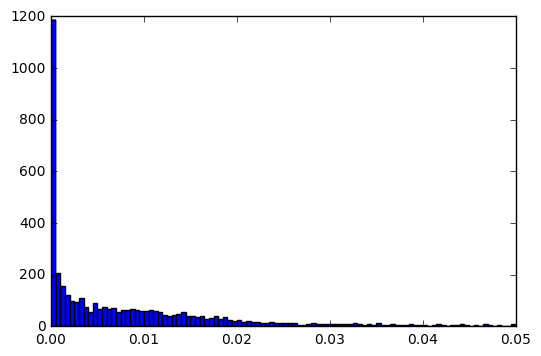

In [9]:
plt.hist(all_acceleration[all_acceleration<0.05], bins=100)
plt.xlim(0, 0.05)
plt.show()

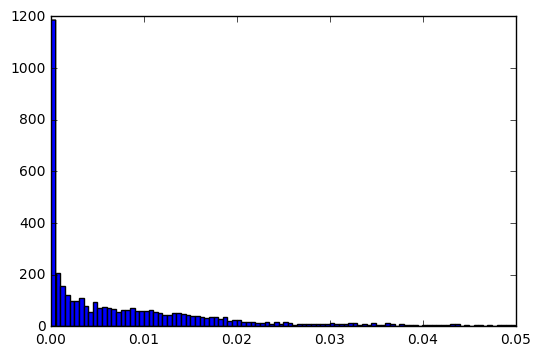

In [10]:
log_acceleration =  np.log(all_acceleration+1)
plt.hist(log_acceleration[log_acceleration<0.05], bins=100)
#plt.xlim(0, 0.05)
#plt.ylim(0,2000)
plt.show()

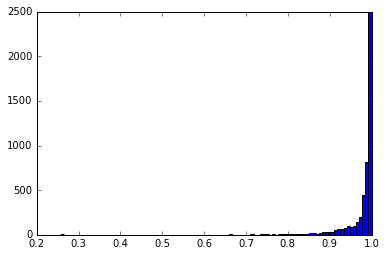

In [78]:
inverse_acceleration =  1.0/(all_acceleration+1)
plt.hist(inverse_acceleration, bins=100)
#plt.xlim(0, 0.05)
#plt.ylim(0,2000)
plt.show()

NameError: name 'all_acceleration' is not defined

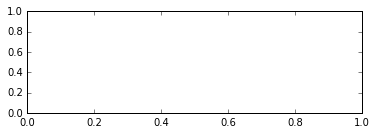

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
loc, scale = stats.norm.fit(all_acceleration)
stats.probplot(all_acceleration, dist=stats.norm, sparams=(loc, scale), plot=ax1)
plt.show()

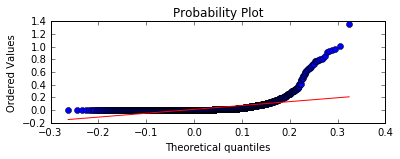

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
loc, scale = stats.norm.fit(log_acceleration)
stats.probplot(log_acceleration, dist=stats.norm, sparams=(loc, scale), plot=ax1)
plt.show()

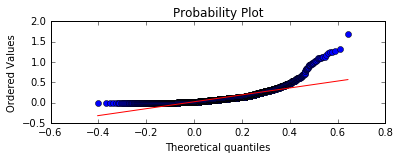

In [83]:
sqrt_acceleration = np.sqrt(all_acceleration)
fig = plt.figure()
ax1 = fig.add_subplot(211)
loc, scale = stats.norm.fit(sqrt_acceleration)
stats.probplot(sqrt_acceleration, dist=stats.norm, sparams=(loc, scale), plot=ax1)
plt.show()

In [65]:
loc, scale = stats.norm.fit(all_acceleration)
print(loc, scale)

(0.035132740809497659, 0.11569225612307799)


In [66]:
vals = np.sqrt(all_acceleration)
df, loc, scale = stats.chi2.fit(vals)
print(df, loc, scale)

(0.4650896616655108, -1.2904453577873008e-28, 0.21005977444367568)


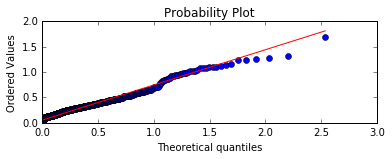

In [67]:
# On sqrt of acceleration
fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(vals, dist=stats.chi2, sparams=(df, loc, scale), plot=ax1)
plt.show()

(0.91612732505396055, -2.5175354361307266e-29, 0.021143488749134562)


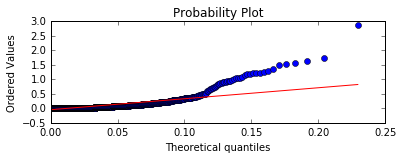

In [68]:
# Weibull distribution
fig = plt.figure()
ax1 = fig.add_subplot(211)
shape, loc, scale = stats.weibull_min.fit(all_acceleration)
print(shape, loc, scale)
stats.probplot(all_acceleration, dist=stats.weibull_min, sparams=(shape, loc, scale), plot=ax1)
plt.show()

(0.6562816548417989, -2.1706478447082398e-30, 0.013989170619808689)


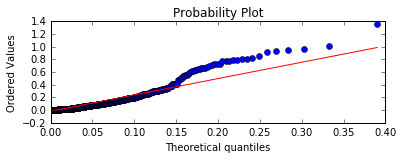

In [70]:
# Weibull on log
fig = plt.figure()
ax1 = fig.add_subplot(211)
shape, loc, scale = stats.weibull_min.fit(log_acceleration)
print(shape, loc, scale)
stats.probplot(log_acceleration, dist=stats.weibull_min, sparams=(shape, loc, scale), plot=ax1)
plt.show()

(-4.3347013138251898e-10, 0.035136342063295065)


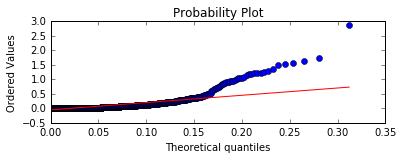

In [77]:
# Exponential
fig = plt.figure()
ax1 = fig.add_subplot(211)
loc, scale = stats.expon.fit(all_acceleration, loc=0)
print(loc, scale)
stats.probplot(all_acceleration, dist=stats.expon, sparams=(loc, scale), plot=ax1)
plt.show()

(-7.9937624932421518e-11, 0.030537427203433734)


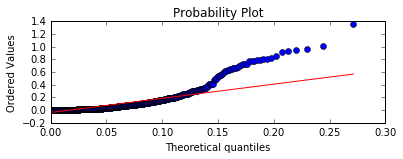

In [76]:
# Exponential on log
fig = plt.figure()
ax1 = fig.add_subplot(211)
loc, scale = stats.expon.fit(log_acceleration)
print(loc, scale)
stats.probplot(log_acceleration, dist=stats.expon, sparams=(loc, scale), plot=ax1)
plt.show()

## Box-Cox

In [71]:
bc_acceleration, bc_lmbda = stats.boxcox(all_acceleration+1)
print(bc_acceleration, bc_lmbda)

(array([  3.21946895e-02,   2.61881523e-02,   1.18675558e-02, ...,
         2.79353434e-02,   0.00000000e+00,   4.59821627e-06]), -24.881571058321882)


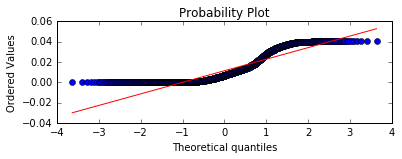

In [72]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
stats.probplot(bc_acceleration, dist=stats.norm, plot=ax2)
plt.show()

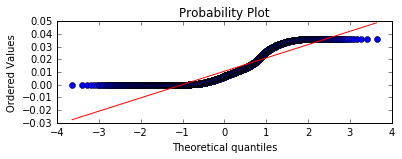

In [73]:
bc_log_acceleration, bc_log_lmbda = stats.boxcox(log_acceleration+1)
fig = plt.figure()
ax2 = fig.add_subplot(211)
stats.probplot(bc_log_acceleration, dist=stats.norm, plot=ax2)
plt.show()

## Angles

In [ ]:
#Create boxplots for each sequence for the angles
#We expect x (and thus anglex) to be distributed either mostly on the negative or mostly on the positive half
fig, axes = plt.subplots(len(datasets), figsize=(10, 50))
for i, dataset in enumerate(datasets):
    print(np.median(dataset['anglex']), np.median(dataset['angley']))
    axes[i].boxplot([dataset['anglex'], dataset['angley'], dataset['anglez']], labels=['x', 'y', 'z']);

In [ ]:
# Look at the distrubtions per activity
by_act = all_data.groupby('Activity')
fig, axes = plt.subplots(len(by_act), figsize=(10, 50))
for i, (activity, dataset) in enumerate(by_act):
    axes[i].boxplot([dataset['anglex'], dataset['angley'], dataset['anglez']], labels=['x', 'y', 'z'])
    axes[i].set_title(activity)

In [ ]:
anglex = np.array([s for d in datasets for s in list(np.array(d['anglex']))])
angley = np.array([s for d in datasets for s in list(np.array(d['angley']))])
anglez = np.array([s for d in datasets for s in list(np.array(d['anglez']))])

In [ ]:
total = anglex + angley + anglez

In [ ]:
plt.boxplot(total);

In [ ]:
print(min(total), max(total))

In [ ]:
print min(anglex), max(anglex)
print min(angley), max(angley)
print min(anglez), max(anglez)

In [ ]:
radtodegree = 180/np.pi
theta = anglex/radtodegree
psi = angley/radtodegree
phi = anglez/radtodegree

In [ ]:
x = np.sin(theta)
y = np.sin(psi)
z = np.tan(phi)*np.sqrt(x**2 + y**2)

In [ ]:
acc = x**2 + y**2 + z**2
plt.boxplot(acc);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='black', s=5)

In [ ]:
print min(anglex + angley), max(anglex + angley)

In [ ]:
radtodegree = np.pi/180
radius = np.sin(anglex/radtodegree)**2 + np.sin(angley/radtodegree)**2 + np.sin(anglez/radtodegree)**2
plt.boxplot(radius);

In [ ]:
fig = subplots(figsize=(15, 15))
plt.scatter(anglex, anglez, color='black', s=5);

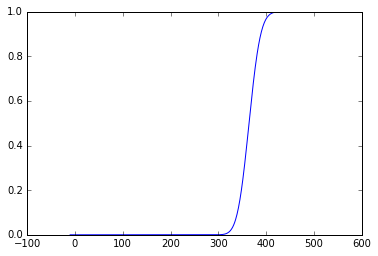

In [21]:
x = np.arange(-10, 600)
y = stats.poisson.cdf(x, mu=364.7, loc=0 )
#y = stats.poisson.logsf(x, mu=364.7, loc=0 )
plt.plot(x,y)

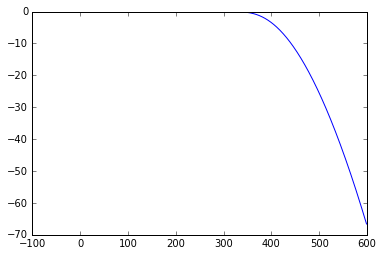

In [22]:
y = stats.poisson.logsf(x, mu=364.7, loc=0 )
plt.plot(x,y)

In [44]:
lmbda = 364.7
x = np.arange(1,17281+1,dtype=np.float64) - 1
stats.poisson.logsf(x, lmbda)

array([  0.,   0.,   0., ..., -inf, -inf, -inf])

In [31]:
x

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         1.72780000e+04,   1.72790000e+04,   1.72800000e+04], dtype=float32)

In [35]:
stats.poisson.cdf(x, lmbda)

array([  4.10017553e-159,   1.49943419e-156,   2.74173592e-154, ...,
         1.00000000e+000,   1.00000000e+000,   1.00000000e+000])

In [36]:
stats.poisson.sf(x,lmbda)

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [37]:
stats.poisson.logsf(x, lmbda)

array([  0.,   0.,   0., ..., -inf, -inf, -inf])

In [38]:
import scipy
scipy.__version__

'0.18.0'

In [42]:
stats._

['/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/scipy/stats']

In [45]:
type(x)

numpy.ndarray